In [1]:
# CODE SETUP RUN BEFORE_ALL_CELLS
# ---------------------- Setup code (run before all cells) ----------------------
# CODE_CELL00: Student Information and Unique Seed Setup
# -------------------------------------------------------
# 🚨 This cell MUST be run first. Enter your student ID exactly as on your student card.

student_id = input("ITBIN-2211-0153: ").strip()

if not student_id:
    raise ValueError("❌ Student ID is required to start the exam.")

# Derive a reproducible numeric seed from the student ID
seed = sum(ord(ch) for ch in student_id) % 10000

import numpy as np
import random

np.random.seed(seed)
random.seed(seed)

print(f"✅ Student ID accepted: {student_id}")
print(f"🔢 Your unique exam seed is: {seed}")
print("⚠️ Do NOT change or re-run with a different ID. This will affect your dataset and may invalidate your exam.")


ITBIN-2211-0153:  ITBIN-2211-0153


✅ Student ID accepted: ITBIN-2211-0153
🔢 Your unique exam seed is: 863
⚠️ Do NOT change or re-run with a different ID. This will affect your dataset and may invalidate your exam.


In [29]:
# CODE_CELL01

import time
import sys
import subprocess
import pkg_resources

# Profile import times
start_total = time.time()
start = time.time()
import sys
print(f"sys import time: {time.time() - start:.3f}s")
start = time.time()
import subprocess
print(f"subprocess import time: {time.time() - start:.3f}s")
start = time.time()
import pkg_resources
print(f"pkg_resources import time: {time.time() - start:.3f}s")

# Profile conda environment query
start = time.time()
try:
    env_name = subprocess.check_output(
        'conda info --envs | findstr "*"',
        shell=True
    ).decode().strip()
    print(env_name)
    print(f"Conda env query time: {time.time() - start:.3f}s")
except Exception as e:
    print(f"Conda env query failed: {e}")

print("Current environment details:", env_name)
print(f"Python executable: {sys.executable}")

# Profile package check
start = time.time()
required_packages = ['pandas', 'numpy', 'scikit-learn', 'nltk', 'matplotlib', 'seaborn', 'wordcloud', 'xgboost', 'imbalanced-learn', 'spacy', 'textblob', 'langdetect', 'emoji', 'plotly', 'scipy']
installed_packages = [pkg.project_name.lower() for pkg in pkg_resources.working_set]
print(f"Package check time: {time.time() - start:.3f}s")

print("\nPackage verification:")
print(installed_packages)

for package in required_packages:
    if package in installed_packages:
        print(f"✓ {package} - installed")
    else:
        print(f"✗ {package} - NOT installed")

print(f"Total cell execution time: {time.time() - start_total:.3f}s")

""" 
If the above method is slow or not working as expected, you can use the following alternative method:
import importlib.metadata

required_packages = ['pandas', 'numpy', 'scikit-learn', 'nltk', 'matplotlib', 'seaborn', 'wordcloud', 'xgboost']
print("\nVerification using importlib.metadata:")

for package in required_packages:
    try:
        version = importlib.metadata.version(package)
        print(f"✅ {package} - Installed (Version: {version})")
    except importlib.metadata.PackageNotFoundError:
        print(f"❌ {package} - NOT installed") """



sys import time: 0.000s
subprocess import time: 0.000s
pkg_resources import time: 0.000s
intelligent_systems_exam_group_a * C:\Users\student.lab1\.conda\envs\intelligent_systems_exam_group_a
Conda env query time: 3.102s
Current environment details: intelligent_systems_exam_group_a * C:\Users\student.lab1\.conda\envs\intelligent_systems_exam_group_a
Python executable: C:\Users\student.lab1\.conda\envs\intelligent_systems_exam_group_a\python.exe
Package check time: 0.000s

Package verification:
['markupsafe', 'pysocks', 'pyyaml', 'send2trash', 'anyio', 'argon2-cffi', 'argon2-cffi-bindings', 'asttokens', 'async-lru', 'attrs', 'babel', 'beautifulsoup4', 'bleach', 'brotlicffi', 'certifi', 'cffi', 'charset-normalizer', 'colorama', 'comm', 'debugpy', 'decorator', 'defusedxml', 'exceptiongroup', 'executing', 'fastjsonschema', 'h11', 'httpcore', 'httpx', 'idna', 'ipykernel', 'ipython', 'jedi', 'jinja2', 'joblib', 'json5', 'jsonschema', 'jsonschema-specifications', 'jupyter-client', 'jupyter-cor

' \nIf the above method is slow or not working as expected, you can use the following alternative method:\nimport importlib.metadata\n\nrequired_packages = [\'pandas\', \'numpy\', \'scikit-learn\', \'nltk\', \'matplotlib\', \'seaborn\', \'wordcloud\', \'xgboost\']\nprint("\nVerification using importlib.metadata:")\n\nfor package in required_packages:\n    try:\n        version = importlib.metadata.version(package)\n        print(f"✅ {package} - Installed (Version: {version})")\n    except importlib.metadata.PackageNotFoundError:\n        print(f"❌ {package} - NOT installed") '

MARKDOWN_CELL01<br>
#### There are main 4 ethical principals. Fairness and justice, accountability and Responsibility, transparency and explainability.below are how these principals are violated.
**Faireness and justice**<br>
- if ai model gives lower score for women beacause training data had most male employees. this can reject female applications.<br>

**Accountability and responsibility**<br>
- if candidate reject because of bug in the system but not take responsible for fix it this violate accountability.<br>

**Transparancy and explanability**<br>
- if the system reject applicant but no explanation why reject applicant. company hr or applicant dont know why decison were made.<br>

**emerging framework**<br>
- if the company ignore  new ai frameworks or laws





In [4]:
# CODE_CELL02

import numpy as np
import pandas as pd

def generate_loan_dataset(n_samples=1000):
    """Generate synthetic loan application dataset with potential bias patterns"""
    
    # Demographics with realistic distributions
    ages = np.random.normal(35, 12, n_samples).astype(int)
    ages = np.clip(ages, 18, 75)
    age_groups = ['Young (18-30)', 'Middle (31-50)', 'Senior (51+)']
    age_categories = [age_groups[0] if age <= 30 else age_groups[1] if age <= 50 else age_groups[2] for age in ages]
    
    genders = np.random.choice(['Male', 'Female'], n_samples, p=[0.6, 0.4])
    ethnicities = np.random.choice(['White', 'Black', 'Hispanic', 'Asian', 'Other'], 
                                  n_samples, p=[0.4, 0.3, 0.15, 0.1, 0.05])
    
    # Financial information
    incomes = np.random.lognormal(10.5, 0.8, n_samples)
    credit_scores = np.random.normal(650, 100, n_samples).astype(int)
    credit_scores = np.clip(credit_scores, 300, 850)
    
    loan_amounts = np.random.lognormal(10, 0.5, n_samples)
    employment_years = np.random.exponential(5, n_samples)
    
    # Introduce bias: Lower approval rates for certain demographics
    base_approval_prob = 0.7
    bias_factors = []
    
    for i in range(n_samples):
        prob = base_approval_prob
        # Income and credit score effects
        prob += (credit_scores[i] - 650) / 1000
        prob += min((incomes[i] - 50000) / 100000, 0.2)
        
        # Introduce systematic bias (this is what students should detect)
        if age_categories[i] == 'Young (18-30)':
            prob -= 0.15  # Bias against young applicants
        if genders[i] == 'Female':
            prob -= 0.1   # Bias against female applicants
        
        bias_factors.append(max(0.05, min(0.95, prob)))
    
    approvals = np.random.binomial(1, bias_factors, n_samples)
    
    return pd.DataFrame({
        'age': ages,
        'age_group': age_categories,
        'gender': genders,
        'ethnicity': ethnicities,
        'annual_income': incomes,
        'credit_score': credit_scores,
        'loan_amount': loan_amounts,
        'employment_years': employment_years,
        'approved': approvals
    })

# Generate the dataset
loan_data = generate_loan_dataset()
print(f"Generated loan dataset with {len(loan_data)} applications")
print(f"Overall approval rate: {loan_data['approved'].mean():.2%}")

loan_data.to_csv("loan_data.csv", index=False)

Generated loan dataset with 1000 applications
Overall approval rate: 50.50%


MARKDOWN_CELL_HINT01

```python
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def show_distribution(column):
    """Show the distribution of a categorical column."""
    counts = df[column].value_counts(normalize=True) * 100
    print(f"Distribution of {column}:")
    print(counts.round(-))   
    counts.plot(kind='bar', title=f"Distribution of {column}")
    plt.show()

def compare_groups(column, target=""): 
    """Compare hiring rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Hiring rates by {column}:")
    print(rates.round(2)
    rates.plot(kind='bar', title=f"Hiring rates by {column}")  
    plt.show()

def plot_histogram(column): 
    """Plot histogram of a numerical variable."""
    plt.hist(df[column], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

def chi_square_test(feature, outcome=""): 
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

def t_test_groups(feature, outcome=""): 
    """T-test for comparing means of a numerical feature between hired vs not hired."""
    group1 = df[df[outcome] == 1][feature]
    group0 = df[df[outcome] = 0][feature]  
    t_stat, p = ttest_ind(group1, group0, equal_var=False)
    print(f"T-test for {feature} by {outcome}")
    print(f"T-statistic = {t_stat:.2f}, p-value = {p:.4f}")
    return p

def correlation_check(feature, outcome=""):
    """Pearson correlation between a numerical feature and hiring outcome."""
    corr, p = pearsonr(df[feature], df[outcome])
    print(f"Correlation between {feature} and {outcome}")
    print(f"Correlation = {corr:.2f}, p-value = {p:.4f}")
    return corr, p

```

Approval rates by age_group:
age_group
Middle (31-50)    0.57
Senior (51+)      0.61
Young (18-30)     0.37
Name: approved, dtype: float64


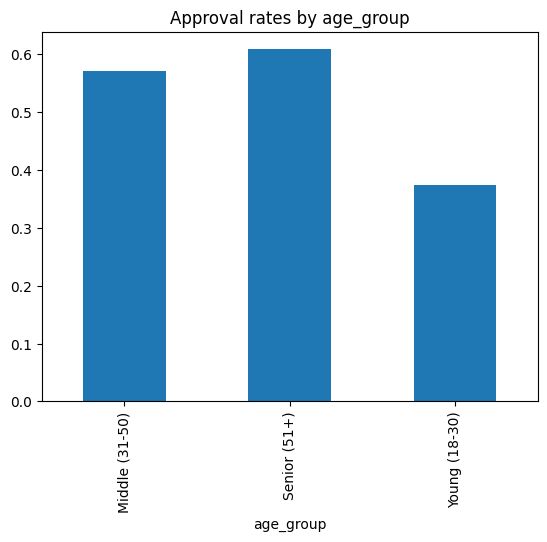

In [43]:
# CODE_CELL03
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
def compare_groups(df, column, target="approved"): 
    """Compare rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Approval rates by {column}:")
    print(rates.round(2)) 
    rates.plot(kind='bar', title=f"Approval rates by {column}")  
    plt.show()

# Calling the function
compare_groups(loan_data, "age_group")















In [37]:
# CODE_CELL04
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def chi_square_test(df, feature, outcome="approved"): 
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

# Call the function
chi_square_test(df=loan_data, feature='gender', outcome='approved')



Chi-square test between gender and approved
Chi2 statistic = 9.53, p-value = 0.0020


np.float64(0.0020197371401307817)

MARKDOWN_CELL02
**chi square test** <br>
- This test check there is a meaningful relationship between two categories here- gender and hiring. This is importance for detecting bias between male and females.<br>

- In simply this test tell us if the system treate male and female applicant differently in hiring  decision.


MARKDOWN_CELL03

#### positive
**Faster loan aproval**
- AI systems can quickly go loan  applications in minutes. This saves time compared to humans, who would take days or weeks to do the same task.

**cheaper** 
- Companies don’t need to hire many HR staff or spend money on long recruitment steps. AI reduces the cost by automating most of the work.

**can process thousand of loan  applications without tired**
- AI can process thousands of loan applications at once without getting tired or bored.

#### negative
**reduce human judgment**
- AI can’t understand people’s personality, motivation, or emotions. It may reject good candidates just because their data doesn’t fit the system’s pattern.

**creativity , empathy not capture in data**
- AI focuses on numbers and keywords. its risk.

**there is also privacy risk**
- collecting and analysing large amount of person data can lead misuse if not properly controlled.


MARKDOWN_CELL04

#### below are responsibilities of financial institutions and recommend regulatory complaince measures.

- developers must design fair loan aproval algorithms and clear documentation.
- management must ensure loan ai tools  meet legal and ethical standards

- they must understand how ai works, reviews its recomendations

- provide correct information in application

#### accountabilities are:
- bias check
- transparancy report
- data protection
- regular audit
- feedback channel


In [24]:
# CODE_CELL05

import random

# Components to randomly combine with sentiment indicators
templates = {
    'positive': [
        "Love this app! {stars} Works perfectly on my {device}",
        "Been using since v{version} - amazing improvements! {device} user here ❤️",
        "¡Excelente aplicación! Funciona muy bien en mi teléfono 📱",
        "アプリがとても使いやすいです。{device}で問題なく動作します。",
        "Fantastic! Best app for productivity. Runs smoothly on {device}",
        "Highly recommend! {stars} Performance is excellent",
    ],
    'negative': [
        "App crashes constantly on {device}. Please fix this bug in v{version} 🐛",
        "Terrible experience! App won't load on my {device}. {rating} until fixed 😡",
        "The login feature is broken. Can't sign in with {account_type} account on {device}",
        "Crashes when opening {feature}. {device}, Android {android_version} 🤳",
        "Worst app ever! Constant bugs on {device}. Uninstalling now",
        "Doesn't work at all. Waste of time on my {device}",
    ],
    'neutral': [
        "Great UI design but needs {feature}. Would rate {stars} with that addition",
        "Please add {feature}. Otherwise perfect app! {rating} stars",
        "App is okay. Works on {device} but could use improvements",
        "Decent app. Not great, not terrible. Running v{version}",
        "It's fine. Does what it says. Using on {device}",
    ]
}

devices = ["iPhone 14", "Samsung Galaxy S21", "iPad Pro", "iPhone 13 Pro", "Pixel 6", "OnePlus 9 Pro", "iPhone 12"]
features = ["dark mode feature", "notification settings", "multi-language support", "offline mode"]
versions = ["1.0", "2.1.3", "3.0", "4.2.1"]
account_types = ["Google", "Facebook", "Apple"]
stars = ["5 stars ⭐⭐⭐⭐⭐", "4/5 stars", "3/5 stars"]
ratings = ["1 star", "2 stars", "3 stars", "4 stars", "5 stars"]
android_versions = ["12", "11", "10"]

# Generate labeled app reviews
app_reviews_random = []
labels = []

for _ in range(100):  # generate 100 random reviews
    # Choose sentiment category
    sentiment = random.choice(['positive', 'negative', 'neutral'])
    
    # Choose template from that sentiment category
    template = random.choice(templates[sentiment])
    
    # Generate review
    review = template.format(
        device=random.choice(devices),
        feature=random.choice(features),
        version=random.choice(versions),
        account_type=random.choice(account_types),
        stars=random.choice(stars),
        rating=random.choice(ratings),
        android_version=random.choice(android_versions)
    )
    
    app_reviews_random.append(review)
    labels.append(sentiment)

# Display samples with labels
print("Sample Reviews with Labels:\n")
for r, label in list(zip(app_reviews_random, labels))[:5]:
    print(f"[{label.upper()}] {r}\n")

print(f"\nCreated {len(app_reviews_random)} labeled reviews")
print(f"Positive: {labels.count('positive')}, Negative: {labels.count('negative')}, Neutral: {labels.count('neutral')}")

# Create a DataFrame from the two lists
reviews_df = pd.DataFrame({
    'review_text': app_reviews_random,
    'sentiment_label': labels
})

# Display the first few rows to verify the structure
print("Reviews DataFrame Head:")
print(reviews_df.head())
print("-" * 30)
print(f"DataFrame Shape: {reviews_df.shape}")

# 2. Save the DataFrame to a CSV file
# index=False prevents pandas from writing the DataFrame index as a column in the CSV
csv_filename = "app_reviews_with_labels.csv"
reviews_df.to_csv(csv_filename, index=False, encoding='utf-8')

print(f"✅ Successfully saved {len(reviews_df)} reviews to {csv_filename}")

Sample Reviews with Labels:

[NEUTRAL] App is okay. Works on Pixel 6 but could use improvements

[NEUTRAL] Please add dark mode feature. Otherwise perfect app! 2 stars stars

[POSITIVE] ¡Excelente aplicación! Funciona muy bien en mi teléfono 📱

[NEGATIVE] Crashes when opening notification settings. iPhone 14, Android 11 🤳

[NEUTRAL] It's fine. Does what it says. Using on iPhone 14


Created 100 labeled reviews
Positive: 35, Negative: 31, Neutral: 34
Reviews DataFrame Head:
                                         review_text sentiment_label
0  App is okay. Works on Pixel 6 but could use im...         neutral
1  Please add dark mode feature. Otherwise perfec...         neutral
2  ¡Excelente aplicación! Funciona muy bien en mi...        positive
3  Crashes when opening notification settings. iP...        negative
4   It's fine. Does what it says. Using on iPhone 14         neutral
------------------------------
DataFrame Shape: (100, 2)
✅ Successfully saved 100 reviews to app_reviews_wit

MARKDOWN_CELL_HINT02

```python
import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm"

# ---------- Cleaning Functions ----------
def basic_clean(text_list):
    """Lowercase text and remove punctuation."""
    cleaned = [re.sub(r'[^\w\s]', '', t.lower()) for t in text_list]
    return cleaned

def remove_stopwords(text_list):
    """Remove common English stopwords."""
    from spacy.lang.en.stop_words import STOP_WORDS
    cleaned = []
    for t in text_list
        tokens = [word for word in t.split() if word not in STOP_WORDS]
        cleaned.append(" ".join(tokens))
    return cleaned

def normalize_text(text_list):
    """Handle punctuation, case, and whitespace consistently."""
    cleaned = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', t)).strip().lower() for t in text_list]
    return cleaned

def remove_emojis(text_list):
    """Remove emojis and other non-text symbols."""
    cleaned = [emoji.replace_emoji(t, replace='') for t in text_list]
    return cleaned

# ---------- Entity Extraction ----------
def extract_entities_spacy(text_list):
    """Extract named entities (organizations, products, locations, order numbers)."""
    entities = []
    for t in text_list:
        doc = nlp(t)
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
    return entities

def extract_numbers(text_list):
    """Extract numeric values (e.g., order IDs, numbers)."""
    numbers = []
    for t in text_list:
        nums = re.findall(r'\d+', t)
        numbers.append(nums)
    return numbers

def remove_urls(text_list):
    """Remove URLs from the text."""
    cleaned = [re.sub(r'http\S+|www\.\S+', '', t) for t in text_list]
    return cleaned

def keyword_match(text_list, keywords):
    """Find keyword matches in text."""
    matches = []
    for t in text_list:
        found = [kw for kw in keywords if kw.lower() in t.lower()]
        matches.apend(found)
    return matches

# ---------- Language Detection ----------
def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

def count_words(text_list):
    """Count words in each feedback."""
    return [len(t.split()) for t in text_list]

def char_length(text_list):
    """Return character length of each feedback."""
    return [len(t) for t in text_list]
```


In [46]:
# CODE_CELL06
import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm"

# ---------- Cleaning Functions ----------
def basic_clean(text_list):
    """Lowercase text and remove punctuation."""
    cleaned = [re.sub(r'[^\w\s]', '', t.lower()) for t in text_list]
    return cleaned

def remove_stopwords(text_list):
    """Remove common English stopwords."""
    from spacy.lang.en.stop_words import STOP_WORDS
    cleaned = []
    for t in text_list
        tokens = [word for word in t.split() if word not in STOP_WORDS]
        cleaned.append(" ".join(tokens))
    return cleaned

def normalize_text(text_list):
    """Handle punctuation, case, and whitespace consistently."""
    cleaned = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', t)).strip().lower() for t in text_list]
    return cleaned

def remove_emojis(text_list):
    """Remove emojis and other non-text symbols."""
    cleaned = [emoji.replace_emoji(t, replace='') for t in text_list]
    return cleaned
# Get the list of text data from the DataFrame
review_text_list = reviews_df['review_text']

# Apply the cleaning functions sequentially
normalized_text = normalize_text(review_text_list)
print("Normalized Text Sample:")
print(normalized_text[:5])
print("-" * 30)

reviews_without_emojis = remove_emojis(normalized_text)
print("Text without Emojis Sample:")
print(reviews_without_emojis[:5])
print("-" * 30)


SyntaxError: '(' was never closed (3203181438.py, line 7)

In [22]:
# CODE_CELL07
import re
import spacy
from langdetect import detect

# ---------- Entity Extraction ----------
def extract_entities_spacy(text_list):
    """Extract named entities (organizations, products, locations, order numbers)."""
    entities = []
    for t in text_list:
        doc = nlp(t)
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
    return entities

def extract_numbers(text_list):
    """Extract numeric values (e.g., order IDs, numbers)."""
    numbers = []
    for t in text_list:
        nums = re.findall(r'\d+', t)
        numbers.append(nums)
    return numbers

def remove_urls(text_list):
    """Remove URLs from the text."""
    cleaned = [re.sub(r'http\S+|www\.\S+', '', t) for t in text_list]
    return cleaned

def keyword_match(text_list, keywords):
    """Find keyword matches in text."""
    matches = []
    for t in text_list:
        found = [kw for kw in keywords if kw.lower() in t.lower()]
        matches.apend(found)
    return matches


In [23]:
# ---------- Language Detection ----------
import re
import spacy
from langdetect import detect

def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

def count_words(text_list):
    """Count words in each feedback."""
    return [len(t.split()) for t in text_list]

def char_length(text_list):
    """Return character length of each feedback."""
    return [len(t) for t in text_list]

MARKDOWN_CELL05
- remove puntuations , special charactors, stop words
- convert everything to lowercase to make it consistence
- normalized text to handle extra spaces and diffrence text stlyes
- used name entity recognition to organizations, product etc..
- use language detection to handle multiplelaguages feedbacks




MARKDOWN_CELL_HINT03

```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report _ accuracy_score, confusion_matrix
import re
from textblob import TextBlob

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only alphabets
    return text.strip(

# Helper function to build sentiment model
def build_sentiment_model()
    vectorizer = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1 2)
    )
    model = LogisticRegression(
        max_iter=1000,  # Increased for convergence
        random_state=42,
        multi_class='multinomial'  
    )
    pipe = Pipeline([
        ('vectorize', vectorizer),
        ('clf', model)
    ]
    return pipe

# Preprocess reviews
cleaned_reviews = [clean_text(r) for r in app_reviews_random

# Use the actual labels generated with the reviews (not random!)
# labels variable should come from the improved CODE_CELL05

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_reviews, 
    labels, 
    test_size=0.2, 
    random_state=42
    stratify=labels
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Label distribution in training: {dict(zip(*zip(*[(l, y_train.count(l)) for l in set(y_train)])))}\n")

# Train model
sentiment_model = build_sentiment_model()
sentiment_model.fit(X_train y_train)
print("Model training completed!\n")

# Predict on test set (not training set!)
predictions = sentiment_model.predict(X_test

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()

# Display sample predictions from test set
print("=== Sample Predictions ===")
for i in range(min(5 len(X_test))):
    original_idx = cleaned_reviews.index(X_test[i])
    print(f"Review: {app_reviews_random[original_idx]}")
    print(f"→ Actual: {y_test[i]}")
    print(f"→ Predicted: {predictions[i]}")
    print(f"→ Match: {'✓' if y_test[i] == predictions[i] else '✗'}\n")

# Function to predict sentiment for new reviews
def predict_sentiment(review_text, model):
    """Predict sentiment for a single review or list of reviews"""
    if isinstance(review_text, str):
        review_text = [review_text]
    
    cleaned = [clean_text(r) for r in review_text]
    preds

# BUG: polarity_score is incomplete
def polarity_score(text):
    # return TextBlob(text).sentiment.polarity

# BUG: classify_sentiment is incomplete
def classify_sentiment(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score  pos_thresh:
        return 'positive'
    elif score  neg_thresh:
        return 'negative'
    else:
        return 'neutral'

# BUG: compare_models is incomplete
# Assuming logistic_model is already trained from Q(b)(i)
def compare_models(texts, model):
    model_preds = model.predict(texts)
    blob_preds = [classify_sentiment(polarity_score(t)) for t in texts]
    comparison = []
    for t, m, b in zip(texts, model_preds, blob_preds):
        comparison.append((t, m, b))
    # return comparison

# Apply to reviews
cleaned = [r.lower() for r in app_reviews_random]
results = compare_models(cleaned, sentiment_model)  # sentiment_model from previous step

# Display first 5 comparisons
for review, model_p, blob_p in results[:5]:
    print(f"Review: {review}\nModel: {model_p}\nTextBlob: {blob_p}\n")
```

In [27]:
# CODE_CELL09
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report _ accuracy_score, confusion_matrix
import re
from textblob import TextBlob


def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only alphabets
    return text.strip(

# Helper function to build sentiment model
def build_sentiment_model()
    vectorizer = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1 2)
    )
    model = LogisticRegression(
        max_iter=1000,  # Increased for convergence
        random_state=42,
        multi_class='multinomial'  
    )
    pipe = Pipeline([
        ('vectorize', vectorizer),
        ('clf', model)
    ]
    return pipe

# Preprocess reviews
cleaned_reviews = [clean_text(r) for r in app_reviews_random

# Use the actual labels generated with the reviews (not random!)
# labels variable should come from the improved CODE_CELL05

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_reviews, 
    labels, 
    test_size=0.2, 
    random_state=42
    stratify=labels
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Label distribution in training: {dict(zip(*zip(*[(l, y_train.count(l)) for l in set(y_train)])))}\n")

# Train model
sentiment_model = build_sentiment_model()
sentiment_model.fit(X_train y_train)
print("Model training completed!\n")

# Predict on test set (not training set!)
predictions = sentiment_model.predict(X_test

# Evaluate model performance
print(f"Accuracy: {accuracy_score(y_test, predictions):.3f}\n")

print("Classification Report:")
print(classification_report(y_test, predictions))

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()

# Display sample predictions from test set
print("=== Sample Predictions ===")
for i in range(min(5 len(X_test))):
    original_idx = cleaned_reviews.index(X_test[i])
    print(f"Review: {app_reviews_random[original_idx]}")
    print(f"→ Actual: {y_test[i]}")
    print(f"→ Predicted: {predictions[i]}")
    print(f"→ Match: {'✓' if y_test[i] == predictions[i] else '✗'}\n")

# Function to predict sentiment for new reviews
def predict_sentiment(review_text, model):
    """Predict sentiment for a single review or list of reviews"""
    if isinstance(review_text, str):
        review_text = [review_text]
    
    cleaned = [clean_text(r) for r in review_text]
    preds

# BUG: polarity_score is incomplete
def polarity_score(text):
    # return TextBlob(text).sentiment.polarity

# BUG: classify_sentiment is incomplete
def classify_sentiment(score, pos_thresh=0.1, neg_thresh=-0.1):
    if score  pos_thresh:
        return 'positive'
    elif score  neg_thresh:
        return 'negative'
    else:
        return 'neutral'

# BUG: compare_models is incomplete
# Assuming logistic_model is already trained from Q(b)(i)
def compare_models(texts, model):
    model_preds = model.predict(texts)
    blob_preds = [classify_sentiment(polarity_score(t)) for t in texts]
    comparison = []
    for t, m, b in zip(texts, model_preds, blob_preds):
        comparison.append((t, m, b))
    # return comparison

# Apply to reviews
cleaned = [r.lower() for r in app_reviews_random]
results = compare_models(cleaned, sentiment_model)  # sentiment_model from previous step

# Display first 5 comparisons
for review, model_p, blob_p in results[:5]:
    print(f"Review: {review}\nModel: {model_p}\nTextBlob: {blob_p}\n")






SyntaxError: invalid syntax (2030731271.py, line 6)

In [28]:
# CODE_CELL10

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report _ accuracy_score, confusion_matrix
import re
from textblob import TextBlob

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # keep only alphabets
    return text.strip(

# Helper function to build sentiment model
def build_sentiment_model()
    vectorizer = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1 2)
    )
    model = LogisticRegression(
        max_iter=1000,  # Increased for convergence
        random_state=42,
        multi_class='multinomial'  
    )
    pipe = Pipeline([
        ('vectorize', vectorizer),
        ('clf', model)
    ]
    return pipe

# Preprocess reviews
cleaned_reviews = [clean_text(r) for r in app_reviews_random

# Use the actual labels generated with the reviews (not random!)
# labels variable should come from the improved CODE_CELL05

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_reviews, 
    labels, 
    test_size=0.2, 
    random_state=42
    stratify=labels
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Label distribution in training: {dict(zip(*zip(*[(l, y_train.count(l)) for l in set(y_train)])))}\n")

# Train model
sentiment_model = build_sentiment_model()
sentiment_model.fit(X_train y_train)
print("Model training completed!\n")


SyntaxError: invalid syntax (1059341587.py, line 7)

MARKDOWN_CELL06

**TF-IDF with Logistic Regression often performs better for structured, supervised sentiment analysis tasks, especially with short texts like tweets, because it learns from specific words and their importance. TextBlob's approach is a simpler, pre-built lexicon-based tool that is faster to implement but may be less accurate because it lacks the context and nuance that a machine-learning model can learn**

##### TF-IDF + Logistic Regression
- How it works
- TF-IDF: This method calculates a score for each word based on its frequency in a document (Term Frequency) and its inverse frequency across all documents in the dataset (Inverse Document Frequency).
  
- Logistic Regression: This is a supervised machine learning algorithm that learns a relationship between the TF-IDF features (word importance scores) and a pre-assigned label

 **pros**
 - higher accuracy
 - handle domain-specific language
 - high performance

**cons**
- Requires labeled data
- Loses word order

##### TextBlob<br>

**pros**
- Fast and easy to use
- No training data needed

**Cons**
- Limited by its lexicon
- Less accurate
- Prone to bias




In [26]:
# CODE_CELL11
import numpy as np
import pandas as pd

def generate_insurance_fraud_dataset(n_samples=2000):
    """
    Generate a synthetic insurance fraud detection dataset.
    
    Args:
        n_samples (int): Number of samples to generate
        random_state (int): Random seed for reproducibility
        
    Returns:
        DataFrame: Synthetic insurance fraud dataset
    """
    
    # Policyholder demographics
    ages = np.random.randint(18, 80, n_samples)
    genders = np.random.choice(['Male', 'Female'], size=n_samples, p=[0.55, 0.45])
    policy_tenure = np.random.randint(1, 25, n_samples)  # years with company
    
    # Policy and claim details
    policy_type = np.random.choice(['Comprehensive', 'Third-Party', 'Collision'], size=n_samples, p=[0.6, 0.25, 0.15])
    vehicle_age = np.random.randint(0, 20, n_samples)  # years
    claim_amount = np.random.normal(5000, 3000, n_samples).clip(100, 30000)
    num_previous_claims = np.random.poisson(lam=1.0, size=n_samples)
    
    # Risk indicators
    claim_duration = np.random.randint(1, 90, n_samples)  # days to settle
    accident_severity = np.random.choice(['Minor', 'Moderate', 'Severe'], size=n_samples, p=[0.6, 0.3, 0.1])
    
    # Fraud label (imbalanced: ~15% fraud cases)
    fraud_probability = (
        (claim_amount > 15000).astype(int) * 0.3 +
        (num_previous_claims > 2).astype(int) * 0.2 +
        (claim_duration < 5).astype(int) * 0.25 +
        (vehicle_age > 15).astype(int) * 0.1
    )
    fraud_probability = np.clip(fraud_probability, 0, 1)
    fraud_label = np.random.binomial(1, p=np.minimum(fraud_probability + 0.05, 0.9))
    
    # Construct DataFrame
    data = pd.DataFrame({
        'Age': ages,
        'Gender': genders,
        'PolicyTenure': policy_tenure,
        'PolicyType': policy_type,
        'VehicleAge': vehicle_age,
        'ClaimAmount': claim_amount.round(2),
        'NumPreviousClaims': num_previous_claims,
        'ClaimDuration': claim_duration,
        'AccidentSeverity': accident_severity,
        'Fraudulent': fraud_label
    })
    
    return data

# Example: Uncomment to generate dataset
loan_df = generate_insurance_fraud_dataset(n_samples=2000)
# df.head()
loan_df.to_csv("insurance_data.csv", index=False)


MARKDOWN_CELL_HINT04


```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy import stats

def plot_distribution(df, column):
    """
    Plot distribution of a numerical or categorical column.
    Uses Plotly for interactivity.
    """
    if pd.api.types.is_numeric_dtype(df[column])
        fig = px.histogram(df, x=column, nbins=30, title=f"Distribution of {column}")
    else:
        fig = px.bar(df[column].value_counts().reset_index(),
                     x="index", y=column, title=f"Distribution of {column}")
    fig.show 
    

def plot_correlation_matrix(df):
    """
    Plot correlation matrix heatmap for numerical columns.
    """
    corr = df.corr(numeric_only=True)
    fig = ff.create_annotated_heatmap(
        z=corr.values,
        x=list(corr.columns),
        y=list(corr.index),
        annotation_text=corr.round(2).values,
        colorscale="Viridis",
    )
    fig.update_layout(title="Correlation Heatmap")
    fig.show()
    return 

def check_missing_values(df):
    """
    Return missing value counts and percentages per column.
    """
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    # return pd.DataFrame('MissingValues': missing, 'Percentage': missing_percent}) 

def impute_missing_values(df, strategy="mean", columns=None):
    """
    Impute missing values with statistical strategy (mean, median, mode).
    Args:
        df: DataFrame
        strategy: 'mean', 'median', or 'mode'
        columns: list of columns to impute (if None, all numeric columns are used)
    """
    if columns is None:
        columns = df.select_dtypes(include=['float64','int64']).columns
    
    for col in columns 
        if strategy == "mean":
            df[col].fillna(df[col].mean(), inplace=True)
        elif strategy == "median":
            df[col].fillna(df[col].median(), inplace=True)
        elif strategy == "mode":
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df


def detect_outliers_iqr(df, column):
    """
    Detect outliers using IQR method.
    Returns indices of outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    return df[(df[column] < lower) | (df[column] > upper)]index


def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-score method.
    Returns indices of outliers.
    """
    z_scores = np.abs(stats.zscore(df[column], nan_policy="omit"))
    return df[z_scores > threshold.index] 


def detect_outliers_isolation_forest(df, columns):
    """
    Detect outliers using Isolation Forest on selected columns.
    Returns indices of outliers.
    """
    iso = IsolationForest(contamination=0.05, random_state=42)
    preds = iso.fit_predict(df[columns])
    return df[preds = -1].index # ERROR


def treat_outliers(df, indices, column, method="cap"):
    """
    Treat outliers by either capping or removing them.
    Args:
        method: 'cap' (replace with percentile bounds) or 'remove' (drop rows)
    """
    if method == "cap":
        lower, upper = df[column].quantile(0.01), df[column].quantile(0.99)
        df.loc[indices, column] = np.clip(df.loc[indices, column], lower, upper)
    elif method == "remove"
        df.drop(indices, inplace=True)
    return df


def compare_before_after(before_df, after_df, column):
    """
    Compare column statistics before and after cleaning.
    Returns a DataFrame with mean, median, std, min, max.
    """
    stats_before = before_df[column].describe()
    stats_after = after_df[column].describe()
    
    comparison = pd.DataFrame({
        "Before": stats_before,
        "After": stats_after
    ) 
    return comparison
```


In [48]:
# CODE_CELL12
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from scipy import stats

def plot_distribution(df, column):
    """
    Plot distribution of a numerical or categorical column.
    Uses Plotly for interactivity.
    """
    if pd.api.types.is_numeric_dtype(df[column])
        fig = px.histogram(df, x=column, nbins=30, title=f"Distribution of {column}")
    else:
        fig = px.bar(df[column].value_counts().reset_index(),
                     x="index", y=column, title=f"Distribution of {column}")
    fig.show 
    

def plot_correlation_matrix(df):
    """
    Plot correlation matrix heatmap for numerical columns.
    """
    corr = df.corr(numeric_only=True)
    fig = ff.create_annotated_heatmap(
        z=corr.values,
        x=list(corr.columns),
        y=list(corr.index),
        annotation_text=corr.round(2).values,
        colorscale="Viridis",
    )
    fig.update_layout(title="Correlation Heatmap")
    fig.show()
    return 

SyntaxError: expected ':' (1181212090.py, line 19)

In [49]:
# CODE_CELL13
def check_missing_values(df):
    """
    Return missing value counts and percentages per column.
    """
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    # return pd.DataFrame('MissingValues': missing, 'Percentage': missing_percent}) 

def impute_missing_values(df, strategy="mean", columns=None):
    """
    Impute missing values with statistical strategy (mean, median, mode).
    Args:
        df: DataFrame
        strategy: 'mean', 'median', or 'mode'
        columns: list of columns to impute (if None, all numeric columns are used)
    """
    if columns is None:
        columns = df.select_dtypes(include=['float64','int64']).columns
    
    for col in columns 
        if strategy == "mean":
            df[col].fillna(df[col].mean(), inplace=True)
        elif strategy == "median":
            df[col].fillna(df[col].median(), inplace=True)
        elif strategy == "mode":
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df


SyntaxError: expected ':' (3197754971.py, line 21)

In [29]:
# CODE_CELL14


In [30]:
# CODE_CELL15

MARKDOWN_CELL_HINT05
```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score

RANDOM_STATE = _ # Use the appropriate function np.random.seed(seed) / random.seed(seed)

def prepare_data(df, target='Fraudulent', drop_cols=None, scale=True, smote=True):
    """Split features and label, optionally scale numeric features and apply SMOTE."""
    if drop_cols is None:
        drop_cols = []
    X = df.drop(columns=[target] + drop_cols)
    # One-hot encode categoricals
    X = pd.get_dummies(X, drop_first=True)
    y = df[target].values
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        stratify=y, random_state=RANDOM_STATE)
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    if smote:
        sm = SMOTE(random_state=RANDOM_STATE)
        X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test

def build_xgboost(X_train, y_train):
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    return model

def build_svm(X_train, y_train, class_weight='balanced'):
    model = SVC(probability=True, class_weight=class_weight, random_state=RANDOM_STATE)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    """Return dict of precision, recall, f1, auc_roc, auc_pr."""
    # predictions and probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
    else:
        # Keras model: predict returns probabilities
        y_prob = model.predict(X_test).ravel()
    y_pred = (y_prob >= 0.5).astype(int)
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)
    aucroc = roc_auc_score(y_test, y_prob)
    aucpr = average_precision_score(y_test, y_prob)
    return {'precision': p, 'recall': r, 'f1': f, 'aucroc': aucroc, 'aucpr': aucpr, 'y_prob': y_prob, 'y_pred': y_pred}

def stratified_cv_scores(model_builder, X, y, n_splits=5):
    """Return cross-validated AUC-PR scores using StratifiedKFold.
       model_builder is a callable that returns a fitted model when given X_train,y_train."""
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    for train_idx, val_idx in skf.split(X, y):
        Xtr, Xv = X[train_idx], X[val_idx]
        ytr, yv = y[train_idx], y[val_idx]
        m = model_builder(Xtr, ytr)
        if hasattr(m, "predict_proba"):
            prob = m.predict_proba(Xv)[:,1]
        else:
            prob = m.predict(Xv).ravel()
        scores.append(average_precision_score(yv, prob))
    return scores

def plot_learning_curves(estimator, X, y, title='Learning Curve'):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=5,
                                                           scoring='average_precision',
                                                           train_sizes=np.linspace(0.1,1.0,5),
                                                           n_jobs=1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='train')
    plt.plot(train_sizes, np.mean(val_scores, axis=1), label='validation')
    plt.xlabel('Train size')
    plt.ylabel('Average Precision')
    plt.title(title)
    plt.legend()
    plt.show()
```

In [47]:
# CODE_CELL16
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score

RANDOM_STATE = _ # Use the appropriate function np.random.seed(seed) / random.seed(seed)

def prepare_data(df, target='Fraudulent', drop_cols=None, scale=True, smote=True):

SyntaxError: incomplete input (361812290.py, line 15)

In [32]:
# CODE_CELL17


In [33]:
# CODE_CELL18
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, average_precision_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [34]:
# CODE_CELL19

MARKDOWN_CELL07

MARKDOWN_CELL08 <br>
 **A Turing mean A test of a machine's ability to exhibit intelligent behaviour equivalent to that of a human**

 **Limitations of Turing Test**
 
 -Limited Measure of Intelligence: The Turing Test focuses on language capabilities, offering a limited perspective on overall machine intelligence in areas like problem-solving, learning, and reasoning.

 - Narrow scope: The test only looks at conversation. It ignores other signs of intelligence like creativity, emotional understanding, or solving real-world problems.

 - Encourages faking it: The test rewards tricking a human judge, not showing true intelligence. This means AIs might be programmed to make mistakes on purpose to seem more human.

 - Limited context: Modern AIs can do many intelligent things, like create images, code, and more, which the simple, text-based Turing Test cannot measure. 






MARKDOWN_CELL09 <br>
**Example 1: Document processing and data extraction with Named Entity Recognition**
- Data ingestion and knowledge extraction<br>

**Example 2: Sentiment analysis for risk identification**
  
- Risk assessment and reasoning
- Recommendation and human review

**Example 3: Constructing a knowledge graph for a holistic view**

**Example 4: Generating explanations with Chain-of-Thought (CoT) reasoning**




MARKDOWN_CELL10
**Transparency and explainability**

**fairness and justice**
- given oppotunities for all male and female persons

**accountablity and responsibility**
- ifn system has bug they are responsible for fix issues


MARKDOWN_CELL11

- Fairness: Retrain models on balanced data, not historical data
- Transparency: Implement Explainable AI (XAI) tools.
- Accountability: Create an independent oversight committee

MARKDOWN_CELL12
- Ignoring AI fairness and transparency can lead to heavy regulatory fines and lawsuits, significant brand damage and loss of customer trust, and worsening societal inequality through biased decisions


MARKDOWN_CELL13

- It balances innovation with responsibility.
- It protects the brand by proactively managing ethical and regulatory risks from biased historical data.
- It allows for safe, controlled testing, validating fairness and performance in the real world before full deployment. 





